<a href="https://colab.research.google.com/github/chepkemoi93/Uwezo-fund-dataset/blob/main/Uwezo_fund_dataset_creation_3_part_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import Standard libraries
import pandas as pd
from numpy import asarray
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

**Loan submission datasets**

# **UWEZO FUND RAW DATA**

In [ ]:
#Read dataset to pandas dataframe
dataset1= pd.read_excel("Emurua Dikirr1.xlsx")
dataset2= pd.read_excel("Kilgoris1.xlsx")
dataset3= pd.read_excel("Narok north1.xlsx")
dataset4= pd.read_excel("Sotik1.xlsx")

In [ ]:
#see what's inside dataset
dataset1.head()

,S/N,DATE OF DISBURSEMNT,GROUP/ INSTITUITION,GFS CODE,SECTOR,CATEGORY,AMOUNT APPROVED,PAYMENT VOUCHER,CHEQUE NO.,ACTUAL AMOUNT ISSUED,REMARKS,Unnamed: 11
0,1,20/12/2014,CHEPNYANYIN,4-033-178-4110202-402,AGRICULTURE,WOMEN,150000,1,1,100000,NaN,NaN
1,2,23/11/2018,CHEPKOIYET JIINUE,4-033-178-4110202-102,TRADE,WOMEN,100000,1,2,100000,NaN,NaN
2,3,22/12/2014,CHANGINA KOLONGEI,4-033-178-4110202-402,AGRICULTURE,WOMEN,50000,1,3,50000,NaN,NaN
3,4,22/12/2014,MOTOSIET ENTERPRICE GROUP,4-033-178-4110201-401,AGRICULTURE,YOUTH,90000,1,4,90000,NaN,NaN
4,5,22/12/2014,KERTAI SACH ANGWAN,4-033-178-4110202-102,TRADE,WOMEN,90000,1,5,90000,NaN,NaN


**Repayment Submission Datasets**

In [ ]:
#Read dataset to pandas dataframe
dataset5= pd.read_excel("Emurua Dikirr2.xlsx")
dataset6= pd.read_excel("Kilgoris2.xlsx")
dataset7= pd.read_excel("Narok North2.xlsx")
dataset8= pd.read_excel("Sotik2.xlsx")

In [ ]:
#see what's inside dataset
dataset1.head()

,S/N,DATE OF DISBURSEMNT,GROUP/ INSTITUITION,GFS CODE,SECTOR,CATEGORY,AMOUNT APPROVED,PAYMENT VOUCHER,CHEQUE NO.,ACTUAL AMOUNT ISSUED,REMARKS,Unnamed: 11
0,1,20/12/2014,CHEPNYANYIN,4-033-178-4110202-402,AGRICULTURE,WOMEN,150000,1,1,100000,NaN,NaN
1,2,23/11/2018,CHEPKOIYET JIINUE,4-033-178-4110202-102,TRADE,WOMEN,100000,1,2,100000,NaN,NaN
2,3,22/12/2014,CHANGINA KOLONGEI,4-033-178-4110202-402,AGRICULTURE,WOMEN,50000,1,3,50000,NaN,NaN
3,4,22/12/2014,MOTOSIET ENTERPRICE GROUP,4-033-178-4110201-401,AGRICULTURE,YOUTH,90000,1,4,90000,NaN,NaN
4,5,22/12/2014,KERTAI SACH ANGWAN,4-033-178-4110202-102,TRADE,WOMEN,90000,1,5,90000,NaN,NaN


**Dimensions of the the datasets**

In [ ]:

dataset1.shape


(255, 12)

In [ ]:
dataset5.shape

(255, 12)

In [ ]:
dataset2.shape

(226, 10)

In [ ]:
dataset6.shape

(249, 12)

In [ ]:
dataset3.shape

(254, 10)

In [ ]:
dataset7.shape

(226, 12)

In [ ]:
dataset4.shape

(396, 11)

In [ ]:
dataset8.shape

(386, 13)

In [ ]:
dataset8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   SNo.                                     386 non-null    int64         
 1   Date of Disbursement                     337 non-null    datetime64[ns]
 2   Name of the group/institution            386 non-null    object        
 3   G.F.S.CODE                               386 non-null    object        
 4   Sector                                   386 non-null    object        
 5   Category                                 386 non-null    object        
 6   Amount Issued (KShs)                     386 non-null    int64         
 7   Amount Due (KShs)                        386 non-null    int64         
 8   Amount repaid (KShs)                     385 non-null    float64       
 9   Amount cummulatively  in arrears (KShs)  38

**Initial Data Cleaning**

In [ ]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   S/N                   255 non-null    int64 
 1   DATE OF DISBURSEMNT   254 non-null    object
 2   GROUP/ INSTITUITION   255 non-null    object
 3   GFS CODE              255 non-null    object
 4   SECTOR                255 non-null    object
 5   CATEGORY              255 non-null    object
 6   AMOUNT APPROVED       255 non-null    int64 
 7   PAYMENT VOUCHER       255 non-null    int64 
 8   CHEQUE NO.            255 non-null    int64 
 9   ACTUAL AMOUNT ISSUED  255 non-null    int64 
 10  REMARKS               5 non-null      object
 11  Unnamed: 11           1 non-null      object
dtypes: int64(5), object(7)
memory usage: 24.0+ KB


In [ ]:
# Removal of specific columns in the datasets
dataset1a=dataset1.drop(['Unnamed: 11'], axis=1)



In [ ]:
dataset1a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   S/N                   255 non-null    int64 
 1   DATE OF DISBURSEMNT   254 non-null    object
 2   GROUP/ INSTITUITION   255 non-null    object
 3   GFS CODE              255 non-null    object
 4   SECTOR                255 non-null    object
 5   CATEGORY              255 non-null    object
 6   AMOUNT APPROVED       255 non-null    int64 
 7   PAYMENT VOUCHER       255 non-null    int64 
 8   CHEQUE NO.            255 non-null    int64 
 9   ACTUAL AMOUNT ISSUED  255 non-null    int64 
 10  REMARKS               5 non-null      object
dtypes: int64(5), object(6)
memory usage: 22.0+ KB


In [ ]:
dataset5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 12 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SNo.                                     255 non-null    int64  
 1   Date of Disbursement                     255 non-null    object 
 2   Name of the group/institution            255 non-null    object 
 3   G.F.S.CODE                               255 non-null    object 
 4   Sector                                   255 non-null    object 
 5   Category                                 255 non-null    object 
 6   Amount Issued (KShs)                     255 non-null    int64  
 7   Amount Due (KShs)                        255 non-null    float64
 8   Amount repaid (KShs)                     255 non-null    int64  
 9   Amount cummulatively  in arrears (KShs)  255 non-null    float64
 10  Outstanding Loan Balance (KShs)          255 non-n

In [ ]:
dataset8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   SNo.                                     386 non-null    int64         
 1   Date of Disbursement                     337 non-null    datetime64[ns]
 2   Name of the group/institution            386 non-null    object        
 3   G.F.S.CODE                               386 non-null    object        
 4   Sector                                   386 non-null    object        
 5   Category                                 386 non-null    object        
 6   Amount Issued (KShs)                     386 non-null    int64         
 7   Amount Due (KShs)                        386 non-null    int64         
 8   Amount repaid (KShs)                     385 non-null    float64       
 9   Amount cummulatively  in arrears (KShs)  38

In [ ]:
dataset8a=dataset8.drop(['Unnamed: 12'], axis=1)

In [ ]:
dataset8a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 12 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   SNo.                                     386 non-null    int64         
 1   Date of Disbursement                     337 non-null    datetime64[ns]
 2   Name of the group/institution            386 non-null    object        
 3   G.F.S.CODE                               386 non-null    object        
 4   Sector                                   386 non-null    object        
 5   Category                                 386 non-null    object        
 6   Amount Issued (KShs)                     386 non-null    int64         
 7   Amount Due (KShs)                        386 non-null    int64         
 8   Amount repaid (KShs)                     385 non-null    float64       
 9   Amount cummulatively  in arrears (KShs)  38

In [ ]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   S/N                   226 non-null    int64 
 1   DATE OF DISBURSEMNT   226 non-null    object
 2   GROUP/ INSTITUITION   226 non-null    object
 3   GFS CODE              225 non-null    object
 4   SECTOR                225 non-null    object
 5   CATEGORY              226 non-null    object
 6   AMOUNT APPROVED       226 non-null    int64 
 7   PAYMENT VOUCHER       226 non-null    object
 8   CHEQUE NO.            226 non-null    int64 
 9   ACTUAL AMOUNT ISSUED  226 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 17.8+ KB


In [ ]:
# Using DataFrame.insert() to add a column
dataset2.insert(10, "REMARKS", True)

In [ ]:
# Using DataFrame.insert() to add a column
dataset3.insert(10, "REMARKS", True)

In [ ]:
dataset4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   S/NO           396 non-null    int64         
 1   DATE OF ISSUE  396 non-null    datetime64[ns]
 2   GROUP NAME     396 non-null    object        
 3   GFS CODE       396 non-null    object        
 4   SECTOR         396 non-null    object        
 5   CATEGORY       396 non-null    object        
 6   APPROVED       396 non-null    int64         
 7   P/VOUCHER      393 non-null    float64       
 8   CHEQUE NO      395 non-null    float64       
 9   AMOUNT ISSUED  395 non-null    float64       
 10  REMARKS        396 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 34.2+ KB


In [ ]:
#Column renaming
dataset4.rename(columns={'S/NO': 'S/N'}, inplace=True)
dataset4.rename(columns={'DATE OF ISSUE': 'DATE OF DISBURSEMNT'}, inplace=True)
dataset4.rename(columns={'GROUP NAME': 'GROUP/ INSTITUITION'}, inplace=True)
dataset4.rename(columns={'APPROVED': 'AMOUNT APPROVED'}, inplace=True)
dataset4.rename(columns={'P/VOUCHER': 'PAYMENT VOUCHER'}, inplace=True)
dataset4.rename(columns={'CHEQUE NO': 'CHEQUE NO.'}, inplace=True)
dataset4.rename(columns={'AMOUNT ISSUED': 'ACTUAL AMOUNT ISSUED'}, inplace=True)
dataset4.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   S/N                   396 non-null    int64         
 1   DATE OF DISBURSEMNT   396 non-null    datetime64[ns]
 2   GROUP/ INSTITUITION   396 non-null    object        
 3   GFS CODE              396 non-null    object        
 4   SECTOR                396 non-null    object        
 5   CATEGORY              396 non-null    object        
 6   AMOUNT APPROVED       396 non-null    int64         
 7   PAYMENT VOUCHER       393 non-null    float64       
 8   CHEQUE NO.            395 non-null    float64       
 9   ACTUAL AMOUNT ISSUED  395 non-null    float64       
 10  REMARKS               396 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 34.2+ KB


**Combining  the multiple datasets I**

In [ ]:
#loan submission dataset
final_Loansubmissiondataset = pd.concat([dataset1a, dataset2, dataset3,dataset4], ignore_index=True)


In [ ]:
final_Loansubmissiondataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131 entries, 0 to 1130
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S/N                   1131 non-null   int64  
 1   DATE OF DISBURSEMNT   1130 non-null   object 
 2   GROUP/ INSTITUITION   1131 non-null   object 
 3   GFS CODE              1130 non-null   object 
 4   SECTOR                1130 non-null   object 
 5   CATEGORY              1131 non-null   object 
 6   AMOUNT APPROVED       1131 non-null   int64  
 7   PAYMENT VOUCHER       1128 non-null   object 
 8   CHEQUE NO.            1130 non-null   float64
 9   ACTUAL AMOUNT ISSUED  1130 non-null   float64
 10  REMARKS               881 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 97.3+ KB


In [ ]:
final_Loansubmissiondataset.head()

,S/N,DATE OF DISBURSEMNT,GROUP/ INSTITUITION,GFS CODE,SECTOR,CATEGORY,AMOUNT APPROVED,PAYMENT VOUCHER,CHEQUE NO.,ACTUAL AMOUNT ISSUED,REMARKS
0,1,20/12/2014,CHEPNYANYIN,4-033-178-4110202-402,AGRICULTURE,WOMEN,150000,1,1.0,100000.0,NaN
1,2,23/11/2018,CHEPKOIYET JIINUE,4-033-178-4110202-102,TRADE,WOMEN,100000,1,2.0,100000.0,NaN
2,3,22/12/2014,CHANGINA KOLONGEI,4-033-178-4110202-402,AGRICULTURE,WOMEN,50000,1,3.0,50000.0,NaN
3,4,22/12/2014,MOTOSIET ENTERPRICE GROUP,4-033-178-4110201-401,AGRICULTURE,YOUTH,90000,1,4.0,90000.0,NaN
4,5,22/12/2014,KERTAI SACH ANGWAN,4-033-178-4110202-102,TRADE,WOMEN,90000,1,5.0,90000.0,NaN


In [ ]:
# saving the dataframe
final_Loansubmissiondataset.to_csv('final_Loansubmissiondataset3.csv')

In [ ]:
#combining repayment submission
final_repaymentsubmissiondataset = pd.concat([dataset5, dataset6, dataset7,dataset8a], ignore_index=True)



In [ ]:
final_repaymentsubmissiondataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116 entries, 0 to 1115
Data columns (total 12 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SNo.                                     1116 non-null   int64  
 1   Date of Disbursement                     853 non-null    object 
 2   Name of the group/institution            1116 non-null   object 
 3   G.F.S.CODE                               1115 non-null   object 
 4   Sector                                   1115 non-null   object 
 5   Category                                 1116 non-null   object 
 6   Amount Issued (KShs)                     1116 non-null   int64  
 7   Amount Due (KShs)                        1116 non-null   float64
 8   Amount repaid (KShs)                     1115 non-null   float64
 9   Amount cummulatively  in arrears (KShs)  1115 non-null   float64
 10  Outstanding Loan Balance (KShs)          1115 no

In [ ]:
final_repaymentsubmissiondataset.head()

,SNo.,Date of Disbursement,Name of the group/institution,G.F.S.CODE,Sector,Category,Amount Issued (KShs),Amount Due (KShs),Amount repaid (KShs),Amount cummulatively in arrears (KShs),Outstanding Loan Balance (KShs),Date of Repayment completion
0,1,20/12/2014,CHEPNYANYIN,4-033-178-4110202-402,AGRICULTURE,WOMEN,100000,300000.0,0.0,300000.0,100000.0,20/06/2017
1,2,23/11/2018,CHEPKOIYET JIINUE,4-033-178-4110202-102,TRADE,WOMEN,100000,0.0,100000.0,-100000.0,0.0,23/05/2021
2,3,22/12/2014,CHANGINA KOLONGEI,4-033-178-4110202-402,AGRICULTURE,WOMEN,50000,150000.0,14666.0,135334.0,35334.0,22/06/2017
3,4,22/12/2014,MOTOSIET ENTERPRICE GROUP,4-033-178-4110201-401,AGRICULTURE,YOUTH,90000,270000.0,0.0,270000.0,90000.0,22/06/2017
4,5,22/12/2014,KERTAI SACH ANGWAN,4-033-178-4110202-102,TRADE,WOMEN,90000,270000.0,0.0,270000.0,90000.0,22/06/2017


In [ ]:
# saving the dataframe
final_repaymentsubmissiondataset.to_csv('final_repaymentsubmissiondataset3.csv')

**Column Renaming II**

In [ ]:
final_repaymentsubmissiondataset.rename(columns={'Amount Issued (KShs)': 'Amount Issued'}, inplace=True)
final_repaymentsubmissiondataset.rename(columns={'Amount Due (KShs)': 'Amount Due'}, inplace=True)
final_repaymentsubmissiondataset.rename(columns={'Amount repaid (KShs)': 'Amount repaid'}, inplace=True)
final_repaymentsubmissiondataset.rename(columns={'Amount cummulatively  in arrears (KShs)': 'Amount cummulatively  in arrears'}, inplace=True)
final_repaymentsubmissiondataset.rename(columns={'Outstanding Loan Balance (KShs)': 'Outstanding Loan Balance'}, inplace=True)

In [ ]:
final_repaymentsubmissiondataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116 entries, 0 to 1115
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   SNo.                              1116 non-null   int64  
 1   Date of Disbursement              853 non-null    object 
 2   Name of the group/institution     1116 non-null   object 
 3   G.F.S.CODE                        1115 non-null   object 
 4   Sector                            1115 non-null   object 
 5   Category                          1116 non-null   object 
 6   Amount Issued                     1116 non-null   int64  
 7   Amount Due                        1116 non-null   float64
 8   Amount repaid                     1115 non-null   float64
 9   Amount cummulatively  in arrears  1115 non-null   float64
 10  Outstanding Loan Balance          1115 non-null   float64
 11  Date of Repayment completion      901 non-null    object 
dtypes: flo

In [ ]:

final_Loansubmissiondataset.rename(columns={'AMOUNT APPROVED': 'Amount Approved'}, inplace=True)
final_Loansubmissiondataset.rename(columns={'PAYMENT VOUCHER': 'Payment Voucher'}, inplace=True)
final_Loansubmissiondataset.rename(columns={'CHEQUE NO.': 'Cheque NO.'}, inplace=True)
final_Loansubmissiondataset.rename(columns={'REMARKS': 'Remarks'}, inplace=True)

In [ ]:
final_Loansubmissiondataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131 entries, 0 to 1130
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S/N                   1131 non-null   int64  
 1   DATE OF DISBURSEMNT   1130 non-null   object 
 2   GROUP/ INSTITUITION   1131 non-null   object 
 3   GFS CODE              1130 non-null   object 
 4   SECTOR                1130 non-null   object 
 5   CATEGORY              1131 non-null   object 
 6   Amount Approved       1131 non-null   int64  
 7   Payment Voucher       1128 non-null   object 
 8   Cheque NO.            1130 non-null   float64
 9   ACTUAL AMOUNT ISSUED  1130 non-null   float64
 10  Remarks               881 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 97.3+ KB


**Combining  the multiple datasets II**

In [ ]:
Uwezofunddataset=  pd.concat([final_Loansubmissiondataset, final_repaymentsubmissiondataset], axis=1 )

In [ ]:
Uwezofunddataset.head()

,S/N,DATE OF DISBURSEMNT,GROUP/ INSTITUITION,GFS CODE,SECTOR,CATEGORY,AMOUNT APPROVED,PAYMENT VOUCHER,CHEQUE NO.,ACTUAL AMOUNT ISSUED,...,Name of the group/institution,G.F.S.CODE,Sector,Category,Amount Issued,Amount Due,Amount repaid,Amount cummulatively in arrears,Outstanding Loan Balance,Date of Repayment completion
0,1,20/12/2014,CHEPNYANYIN,4-033-178-4110202-402,AGRICULTURE,WOMEN,150000,1,1.0,100000.0,...,CHEPNYANYIN,4-033-178-4110202-402,AGRICULTURE,WOMEN,100000.0,300000.0,0.0,300000.0,100000.0,20/06/2017
1,2,23/11/2018,CHEPKOIYET JIINUE,4-033-178-4110202-102,TRADE,WOMEN,100000,1,2.0,100000.0,...,CHEPKOIYET JIINUE,4-033-178-4110202-102,TRADE,WOMEN,100000.0,0.0,100000.0,-100000.0,0.0,23/05/2021
2,3,22/12/2014,CHANGINA KOLONGEI,4-033-178-4110202-402,AGRICULTURE,WOMEN,50000,1,3.0,50000.0,...,CHANGINA KOLONGEI,4-033-178-4110202-402,AGRICULTURE,WOMEN,50000.0,150000.0,14666.0,135334.0,35334.0,22/06/2017
3,4,22/12/2014,MOTOSIET ENTERPRICE GROUP,4-033-178-4110201-401,AGRICULTURE,YOUTH,90000,1,4.0,90000.0,...,MOTOSIET ENTERPRICE GROUP,4-033-178-4110201-401,AGRICULTURE,YOUTH,90000.0,270000.0,0.0,270000.0,90000.0,22/06/2017
4,5,22/12/2014,KERTAI SACH ANGWAN,4-033-178-4110202-102,TRADE,WOMEN,90000,1,5.0,90000.0,...,KERTAI SACH ANGWAN,4-033-178-4110202-102,TRADE,WOMEN,90000.0,270000.0,0.0,270000.0,90000.0,22/06/2017


In [ ]:
Uwezofunddataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131 entries, 0 to 1130
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   S/N                               1131 non-null   int64  
 1   DATE OF DISBURSEMNT               1130 non-null   object 
 2   GROUP/ INSTITUITION               1131 non-null   object 
 3   GFS CODE                          1130 non-null   object 
 4   SECTOR                            1130 non-null   object 
 5   CATEGORY                          1131 non-null   object 
 6   AMOUNT APPROVED                   1131 non-null   int64  
 7   PAYMENT VOUCHER                   1128 non-null   object 
 8   CHEQUE NO.                        1130 non-null   float64
 9   ACTUAL AMOUNT ISSUED              1130 non-null   float64
 10  REMARKS                           881 non-null    object 
 11  SNo.                              1116 non-null   float64
 12  Date o

**Removal of unwanted observations**

This includes deleting duplicate/ redundant or irrelevant values from the dataset. Duplicate observations arose during data collection and Irrelevant observations are those that don’t actually fit our specific problem.


*   Redundant observations alter the efficiency to a great extent as the data repeats and may add towards the correct side or towards the incorrect side, thereby producing unfaithful results.
*   Irrelevant observations are any type of data that is of no use to us and can be removed directly.

Now we have to make a decision according to the subject of analysis, which factor is important for our discussion. As we know our machines don’t understand the text data. So, we have to either drop or convert the categorical column values into numerical types.

In [ ]:

Uwezofunddataset.drop(columns=["S/N", "DATE OF DISBURSEMNT","GROUP/ INSTITUITION","GFS CODE","SECTOR","CATEGORY","ACTUAL AMOUNT ISSUED"], inplace=True)

In [ ]:
Uwezofunddataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131 entries, 0 to 1130
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   AMOUNT APPROVED                   1131 non-null   int64  
 1   PAYMENT VOUCHER                   1128 non-null   object 
 2   CHEQUE NO.                        1130 non-null   float64
 3   REMARKS                           881 non-null    object 
 4   SNo.                              1116 non-null   float64
 5   Date of Disbursement              853 non-null    object 
 6   Name of the group/institution     1116 non-null   object 
 7   G.F.S.CODE                        1115 non-null   object 
 8   Sector                            1115 non-null   object 
 9   Category                          1116 non-null   object 
 10  Amount Issued                     1116 non-null   float64
 11  Amount Due                        1116 non-null   float64
 12  Amount

In [ ]:
# Print the first few rows of the "Date of Disbursement" column
print(Uwezofunddataset["Date of Disbursement"].head())

0    20/12/2014
1    23/11/2018
2    22/12/2014
3    22/12/2014
4    22/12/2014
Name: Date of Disbursement, dtype: object


In [ ]:
non_date_values = Uwezofunddataset["Date of Disbursement"].apply(lambda x: not pd.to_datetime(x, errors="coerce"))
non_date_values.sum()

<ipython-input-53-b2a680bf6549>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  non_date_values = Uwezofunddataset["Date of Disbursement"].apply(lambda x: not pd.to_datetime(x, errors="coerce"))


0

In [ ]:
# Option 2: Replace non-date values with a specific date
Uwezofunddataset["Date of Disbursement"] = Uwezofunddataset["Date of Disbursement"].apply(lambda x: pd.to_datetime(x, errors="coerce") if not pd.isnull(x) else pd.to_datetime("2014-01-01"))

<ipython-input-55-ada1e14c4efa>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  Uwezofunddataset["Date of Disbursement"] = Uwezofunddataset["Date of Disbursement"].apply(lambda x: pd.to_datetime(x, errors="coerce") if not pd.isnull(x) else pd.to_datetime("2014-01-01"))


In [ ]:
# Convert the column to dates
Uwezofunddataset["Date of Disbursement"] = pd.to_datetime(Uwezofunddataset["Date of Disbursement"])

In [ ]:
Uwezofunddataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131 entries, 0 to 1130
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   AMOUNT APPROVED                   1131 non-null   int64         
 1   PAYMENT VOUCHER                   1128 non-null   object        
 2   CHEQUE NO.                        1130 non-null   float64       
 3   REMARKS                           881 non-null    object        
 4   SNo.                              1116 non-null   float64       
 5   Date of Disbursement              1131 non-null   datetime64[ns]
 6   Name of the group/institution     1116 non-null   object        
 7   G.F.S.CODE                        1115 non-null   object        
 8   Sector                            1115 non-null   object        
 9   Category                          1116 non-null   object        
 10  Amount Issued                     1116 non-null 

In [ ]:
Uwezofunddataset.head()

,AMOUNT APPROVED,PAYMENT VOUCHER,CHEQUE NO.,REMARKS,SNo.,Date of Disbursement,Name of the group/institution,G.F.S.CODE,Sector,Category,Amount Issued,Amount Due,Amount repaid,Amount cummulatively in arrears,Outstanding Loan Balance,Date of Repayment completion
0,150000,1,1.0,NaN,1.0,2014-12-20,CHEPNYANYIN,4-033-178-4110202-402,AGRICULTURE,WOMEN,100000.0,300000.0,0.0,300000.0,100000.0,20/06/2017
1,100000,1,2.0,NaN,2.0,2018-11-23,CHEPKOIYET JIINUE,4-033-178-4110202-102,TRADE,WOMEN,100000.0,0.0,100000.0,-100000.0,0.0,23/05/2021
2,50000,1,3.0,NaN,3.0,2014-12-22,CHANGINA KOLONGEI,4-033-178-4110202-402,AGRICULTURE,WOMEN,50000.0,150000.0,14666.0,135334.0,35334.0,22/06/2017
3,90000,1,4.0,NaN,4.0,2014-12-22,MOTOSIET ENTERPRICE GROUP,4-033-178-4110201-401,AGRICULTURE,YOUTH,90000.0,270000.0,0.0,270000.0,90000.0,22/06/2017
4,90000,1,5.0,NaN,5.0,2014-12-22,KERTAI SACH ANGWAN,4-033-178-4110202-102,TRADE,WOMEN,90000.0,270000.0,0.0,270000.0,90000.0,22/06/2017


In [ ]:
non_date_values = Uwezofunddataset["Date of Repayment completion"].apply(lambda x: not pd.to_datetime(x, errors="coerce"))
non_date_values.sum()

<ipython-input-59-a12a6ff61e84>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  non_date_values = Uwezofunddataset["Date of Repayment completion"].apply(lambda x: not pd.to_datetime(x, errors="coerce"))
<ipython-input-59-a12a6ff61e84>:1: UserWarning: Parsing dates in  %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  non_date_values = Uwezofunddataset["Date of Repayment completion"].apply(lambda x: not pd.to_datetime(x, errors="coerce"))


0

In [ ]:
# Option 2: Replace non-date values with a specific date
Uwezofunddataset["Date of Repayment completion"] = Uwezofunddataset["Date of Repayment completion"].apply(lambda x: pd.to_datetime(x, errors="coerce") if not pd.isnull(x) else pd.to_datetime("2017-01-01"))

<ipython-input-60-1ed4739c5b14>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  Uwezofunddataset["Date of Repayment completion"] = Uwezofunddataset["Date of Repayment completion"].apply(lambda x: pd.to_datetime(x, errors="coerce") if not pd.isnull(x) else pd.to_datetime("2017-01-01"))
<ipython-input-60-1ed4739c5b14>:2: UserWarning: Parsing dates in  %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  Uwezofunddataset["Date of Repayment completion"] = Uwezofunddataset["Date of Repayment completion"].apply(lambda x: pd.to_datetime(x, errors="coerce") if not pd.isnull(x) else pd.to_datetime("2017-01-01"))


In [ ]:
# Convert the column to dates
Uwezofunddataset["Date of Repayment completion"] = pd.to_datetime(Uwezofunddataset["Date of Repayment completion"])

In [ ]:
Uwezofunddataset.head()

,AMOUNT APPROVED,PAYMENT VOUCHER,CHEQUE NO.,REMARKS,SNo.,Date of Disbursement,Name of the group/institution,G.F.S.CODE,Sector,Category,Amount Issued,Amount Due,Amount repaid,Amount cummulatively in arrears,Outstanding Loan Balance,Date of Repayment completion
0,150000,1,1.0,NaN,1.0,2014-12-20,CHEPNYANYIN,4-033-178-4110202-402,AGRICULTURE,WOMEN,100000.0,300000.0,0.0,300000.0,100000.0,2017-06-20
1,100000,1,2.0,NaN,2.0,2018-11-23,CHEPKOIYET JIINUE,4-033-178-4110202-102,TRADE,WOMEN,100000.0,0.0,100000.0,-100000.0,0.0,2021-05-23
2,50000,1,3.0,NaN,3.0,2014-12-22,CHANGINA KOLONGEI,4-033-178-4110202-402,AGRICULTURE,WOMEN,50000.0,150000.0,14666.0,135334.0,35334.0,2017-06-22
3,90000,1,4.0,NaN,4.0,2014-12-22,MOTOSIET ENTERPRICE GROUP,4-033-178-4110201-401,AGRICULTURE,YOUTH,90000.0,270000.0,0.0,270000.0,90000.0,2017-06-22
4,90000,1,5.0,NaN,5.0,2014-12-22,KERTAI SACH ANGWAN,4-033-178-4110202-102,TRADE,WOMEN,90000.0,270000.0,0.0,270000.0,90000.0,2017-06-22


In [ ]:
Uwezofunddataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131 entries, 0 to 1130
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   AMOUNT APPROVED                   1131 non-null   int64         
 1   PAYMENT VOUCHER                   1128 non-null   object        
 2   CHEQUE NO.                        1130 non-null   float64       
 3   REMARKS                           881 non-null    object        
 4   SNo.                              1116 non-null   float64       
 5   Date of Disbursement              1131 non-null   datetime64[ns]
 6   Name of the group/institution     1116 non-null   object        
 7   G.F.S.CODE                        1115 non-null   object        
 8   Sector                            1115 non-null   object        
 9   Category                          1116 non-null   object        
 10  Amount Issued                     1116 non-null 

In [ ]:
Uwezofunddataset.head()

,Amount Approved,Date of Disbursement,Name of the group/institution,G.F.S.CODE,Sector,Category,Amount Issued,Amount Due,Amount repaid,Amount cummulatively in arrears,Outstanding Loan Balance,Date of Repayment completion
0,150000,2017-06-20,CHEPNYANYIN,4-033-178-4110202-402,AGRICULTURE,WOMEN,100000.0,300000.0,0.0,300000.0,100000.0,2017-06-20
1,100000,2021-05-23,CHEPKOIYET JIINUE,4-033-178-4110202-102,TRADE,WOMEN,100000.0,0.0,100000.0,-100000.0,0.0,2021-05-23
2,50000,2017-06-22,CHANGINA KOLONGEI,4-033-178-4110202-402,AGRICULTURE,WOMEN,50000.0,150000.0,14666.0,135334.0,35334.0,2017-06-22
3,90000,2017-06-22,MOTOSIET ENTERPRICE GROUP,4-033-178-4110201-401,AGRICULTURE,YOUTH,90000.0,270000.0,0.0,270000.0,90000.0,2017-06-22
4,90000,2017-06-22,KERTAI SACH ANGWAN,4-033-178-4110202-102,TRADE,WOMEN,90000.0,270000.0,0.0,270000.0,90000.0,2017-06-22


In [ ]:
#check and Count for missing values
Uwezofunddataset.isnull().sum()

AMOUNT APPROVED                       0
PAYMENT VOUCHER                       3
CHEQUE NO.                            1
REMARKS                             250
SNo.                                 15
Date of Disbursement                  0
Name of the group/institution        15
G.F.S.CODE                           16
Sector                               16
Category                             15
Amount Issued                        15
Amount Due                           15
Amount repaid                        16
Amount cummulatively  in arrears     16
Outstanding Loan Balance             16
Date of Repayment completion          2
dtype: int64

In [ ]:
# Selecting duplicate rows except first
# occurrence based on all columns
duplicate = Uwezofunddataset[Uwezofunddataset.duplicated()]

print("Duplicate Rows :")

# Print the resultant Dataframe
duplicate

Duplicate Rows :


,AMOUNT APPROVED,PAYMENT VOUCHER,CHEQUE NO.,REMARKS,SNo.,Date of Disbursement,Name of the group/institution,G.F.S.CODE,Sector,Category,Amount Issued,Amount Due,Amount repaid,Amount cummulatively in arrears,Outstanding Loan Balance,Date of Repayment completion


In [ ]:
# Find the duplicate columns
duplicate_columns = Uwezofunddataset.columns[Uwezofunddataset.columns.duplicated()]
duplicate_columns

Index([], dtype='object')

In [ ]:
Uwezofunddataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131 entries, 0 to 1130
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   AMOUNT APPROVED                   1131 non-null   int64         
 1   PAYMENT VOUCHER                   1128 non-null   object        
 2   CHEQUE NO.                        1130 non-null   float64       
 3   REMARKS                           881 non-null    object        
 4   SNo.                              1116 non-null   float64       
 5   Date of Disbursement              1131 non-null   datetime64[ns]
 6   Name of the group/institution     1116 non-null   object        
 7   G.F.S.CODE                        1115 non-null   object        
 8   Sector                            1115 non-null   object        
 9   Category                          1116 non-null   object        
 10  Amount Issued                     1116 non-null 

**Assess missing values**

In [ ]:
#check and Count for missing values
Uwezofunddataset.isnull().sum()

AMOUNT APPROVED                       0
PAYMENT VOUCHER                       3
CHEQUE NO.                            1
REMARKS                             250
SNo.                                 15
Date of Disbursement                  0
Name of the group/institution        15
G.F.S.CODE                           16
Sector                               16
Category                             15
Amount Issued                        15
Amount Due                           15
Amount repaid                        16
Amount cummulatively  in arrears     16
Outstanding Loan Balance             16
Date of Repayment completion          2
dtype: int64

**Exploratory Data  Analysis**

In [ ]:
#Descriptive Statistics
Uwezofunddataset.describe()

,AMOUNT APPROVED,CHEQUE NO.,SNo.,Date of Disbursement,Amount Issued,Amount Due,Amount repaid,Amount cummulatively in arrears,Outstanding Loan Balance,Date of Repayment completion
count,1131.000000,1130.000000,1116.000000,1131,1116.000000,1116.000000,1115.000000,1115.000000,1115.000000,1129
mean,99921.396994,154.239823,147.081541,2015-12-05 08:44:33.740053248,97911.290323,109001.455795,29021.386547,97218.854410,68921.514798,2018-11-11 01:12:42.090345472
min,50000.000000,0.000000,1.000000,1970-01-01 00:00:00.000042156,50000.000000,0.000000,0.000000,-400000.000000,0.000000,2017-01-01 00:00:00
25%,70000.000000,71.000000,70.000000,2014-12-20 00:00:00,70000.000000,41625.000000,0.000000,30000.000000,36637.500000,2017-06-16 00:00:00
50%,100000.000000,144.000000,140.000000,2015-02-13 00:00:00,100000.000000,95800.000000,10000.000000,90000.000000,68500.000000,2017-08-30 00:00:00
75%,100000.000000,223.000000,210.000000,2015-07-20 00:00:00,100000.000000,150000.000000,43362.500000,150000.000000,100000.000000,2020-10-27 00:00:00
max,440000.000000,940.000000,386.000000,2023-06-16 00:00:00,440000.000000,802083.333333,400000.000000,775083.333333,440000.000000,2025-12-17 00:00:00
std,55668.343765,103.819365,93.406530,NaN,52010.860006,99663.907895,45436.741795,108094.533387,54158.669980,NaN


In [ ]:
Uwezofunddataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131 entries, 0 to 1130
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Amount Approved                   1131 non-null   int64         
 1   Date of Disbursement              1129 non-null   datetime64[ns]
 2   Name of the group/institution     1116 non-null   object        
 3   G.F.S.CODE                        1115 non-null   object        
 4   Sector                            1115 non-null   object        
 5   Category                          1116 non-null   object        
 6   Amount Issued                     1116 non-null   float64       
 7   Amount Due                        1116 non-null   float64       
 8   Amount repaid                     1115 non-null   float64       
 9   Amount cummulatively  in arrears  1115 non-null   float64       
 10  Outstanding Loan Balance          1115 non-null 

In [ ]:
# replace Youth, Women, PWD in column 'Sector '
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace='YOUTH', value='TREE NURSERY')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace='WOMEN', value='AGRICULTURE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace='PWD', value='BEE KEEPING')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace='nan', value='AGRICULTURE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace='nan', value='AGRICULTURE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace='AGRICU', value='AGRICULTURE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace='AGRICUL', value='AGRICULTURE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace='AGRIBIZ', value='AAgribusiness')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace='AGRIC', value='AGRICULTURE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace='Agriculture', value='AGRICULTURE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace='PRODUCTION', value='MANUFACTURING')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace='AAgribusiness', value='SERVICE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace='MILK', value='AGRICULTURE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace='BODABODA', value='SERVICE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace='CEREALS', value='TRADE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace='CURIOS', value='SERVICE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace='MAIZE', value='AGRICULTURE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace='CATTLE',value='AGRICULTURE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace='MAIZE', value='AGRICULTURE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace='TABLE BANKING', value='SERVICE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'CER4EALS', value='TRADE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'BEEE-KEEEPING', value='AGRICULTURE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'BEANS', value='TRADE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'GOATS', value='AGRICULTURE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'FUEL', value='TRADE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'RETAIL SHOP', value='TRADE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'GROCERY', value='TRADE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace='CAR WASHING', value='SERVICE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'BOUTIQUE', value='TRADE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'RETAIL & BOUTIQUE', value='TRADE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace='CARPENTRY', value='MANUFACTURING')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace='AGROVET', value='SERVICE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'POULTRY', value='AGRICULTURE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'MAIZE FARMING', value='AGRICULTURE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'BEANS FARMING', value='AGRICULTURE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'BULL/STEERS', value='AGRICULTURE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'BULLS/STEERS', value='AGRICULTURE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'HORTICULTURE', value='AGRICULTURE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'SUGARCANE', value='AGRICULTURE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'BULLS FATTENING', value='AGRICULTURE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'FARMING', value='AGRICULTURE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace=  'DAIRY FARMING', value='AGRICULTURE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'FISH FARMING', value='AGRICULTURE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'ONIONS FARMING', value='AGRICULTURE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'GREEN HOUSE', value='AGRICULTURE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'BULLS', value='AGRICULTURE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'STEERS', value='AGRICULTURE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'Others', value='OTHERS')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'Agribusiness', value='SERVICE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'Agribusiness ', value='SERVICE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'BULL FATTENING', value='AGRICULTURE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'Livestock keeping', value='AGRICULTURE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'BULL FATTENING', value='AGRICULTURE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'Livestock keeping', value='AGRICULTURE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'GREENHOUSE', value='AGRICULTURE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'BEE KEEPING', value='AGRICULTURE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'TREE NURSERY', value='AGRICULTURE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'TREE S', value='AGRICULTURE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'TABLE BANKING/ICT', value='SERVICE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'ICT', value='SERVICE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'TABLEBANKING', value='SERVICE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace=  'Services',  value='SERVICE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace=  'MPESA-SERVICE',  value='SERVICE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace='BRICK MAKING', value='MANUFACTURING')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'LIGHT/M', value='MANUFACTURING')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace='LIGHT MANUFACTURING', value='MANUFACTURING')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace='CONSTRUCTION', value='MANUFACTURING')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'MAIZE TRADING', value='TRADE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'BEANS', value='TRADE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'BEANS TRADE', value='TRADE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'WHOLESALE', value='TRADE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'RETAIL& SALOON', value='TRADE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'CLOTHING BUSINESS', value='TRADE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'BUSINESS',value='TRADE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'RETAIL TRADE', value='TRADE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'RETAIL', value='TRADE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace='TRADE-MAIZE', value='TRADE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'TRADE-BEANS', value='TRADE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'TRADE-CATTLE',value='TRADE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'TREADE', value='TRADE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'Trade', value='TRADE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace= 'Trade ',value='TRADE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace=   'SERVICE',  value='SERVICE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace=  'SALOON',  value='SERVICE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace=   'TAILORING',  value='SERVICE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace=   'OTHERS',  value='SERVICE')
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].replace(to_replace=   'CYBER',  value='SERVICE')

In [ ]:
Uwezofunddataset['Sector'].unique()

array(['AGRICULTURE', 'TRADE', 'SERVICE', 'MANUFACTURING', nan],
      dtype=object)

Sector
AGRICULTURE      655
TRADE            277
SERVICE          172
MANUFACTURING     11
Name: count, dtype: int64

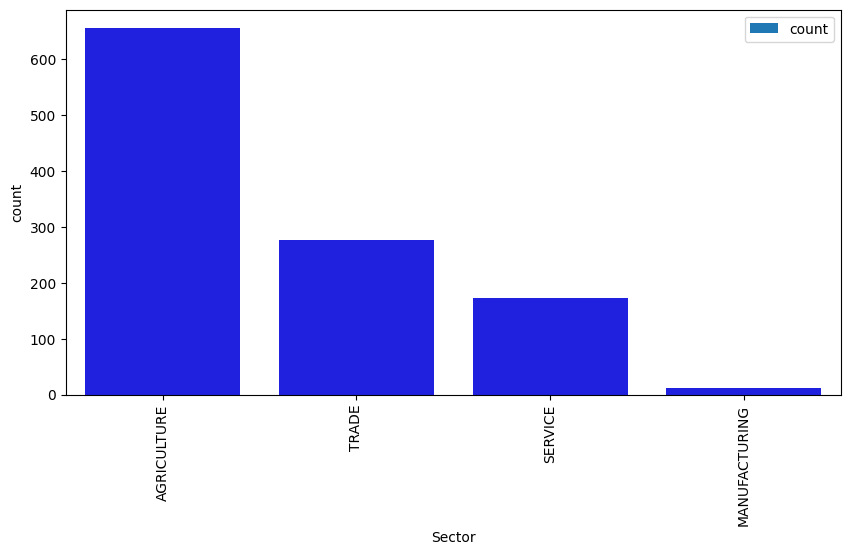

In [ ]:
plt.figure(figsize=(10,5))
Uwezofunddataset['Sector'].value_counts().plot(kind='bar')
sns.barplot(x=Uwezofunddataset['Sector'].value_counts().index, y=Uwezofunddataset['Sector'].value_counts(), color='blue')
Uwezofunddataset['Sector'].value_counts()

In [ ]:
Uwezofunddataset['Category'] = Uwezofunddataset['Category'].replace(to_replace='W0MEN', value='WOMEN')
Uwezofunddataset['Category'] = Uwezofunddataset['Category'].replace(to_replace='Youth', value='YOUTH')
Uwezofunddataset['Category'] = Uwezofunddataset['Category'].replace(to_replace='PLWDs', value='PWD')
Uwezofunddataset['Category'] = Uwezofunddataset['Category'].replace(to_replace='Women', value='WOMEN')
Uwezofunddataset['Category'] = Uwezofunddataset['Category'].replace(to_replace='Women (Declined) ',value='WOMEN')
Uwezofunddataset['Category'] = Uwezofunddataset['Category'].replace(to_replace='Youth (Declined)', value= 'YOUTH')
Uwezofunddataset['Category'] = Uwezofunddataset['Category'].replace(to_replace='Women (Declined)', value='WOMEN')
Uwezofunddataset['Category'] = Uwezofunddataset['Category'].replace(to_replace='women', value='WOMEN')
Uwezofunddataset['Category'] = Uwezofunddataset['Category'].replace(to_replace='AGRICULTURE', value='WOMEN')
Uwezofunddataset['Category'] = Uwezofunddataset['Category'].replace(to_replace='SERVICE', value='YOUTH')
Uwezofunddataset['Category'] = Uwezofunddataset['Category'].replace(to_replace='TRADE',value='WOMEN')
Uwezofunddataset['Category'] = Uwezofunddataset['Category'].replace(to_replace='TREE NURSERY',  value='PWD')
Uwezofunddataset['Category'] = Uwezofunddataset['Category'].replace(to_replace= 'WOMEN ', value='WOMEN')
Uwezofunddataset['Category'] = Uwezofunddataset['Category'].replace(to_replace='TRADE ', value='WOMEN')

In [ ]:
Uwezofunddataset['Category'].unique()

array(['WOMEN', 'YOUTH', 'PWD', nan], dtype=object)

Category
WOMEN    627
YOUTH    465
PWD       24
Name: count, dtype: int64

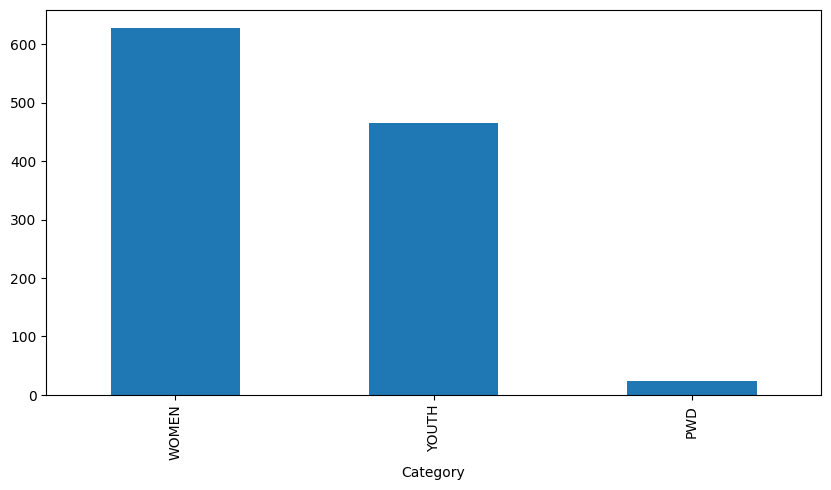

In [ ]:
plt.figure(figsize=(10,5))
Uwezofunddataset['Category'].value_counts().plot(kind='bar')
Uwezofunddataset['Category'].value_counts()

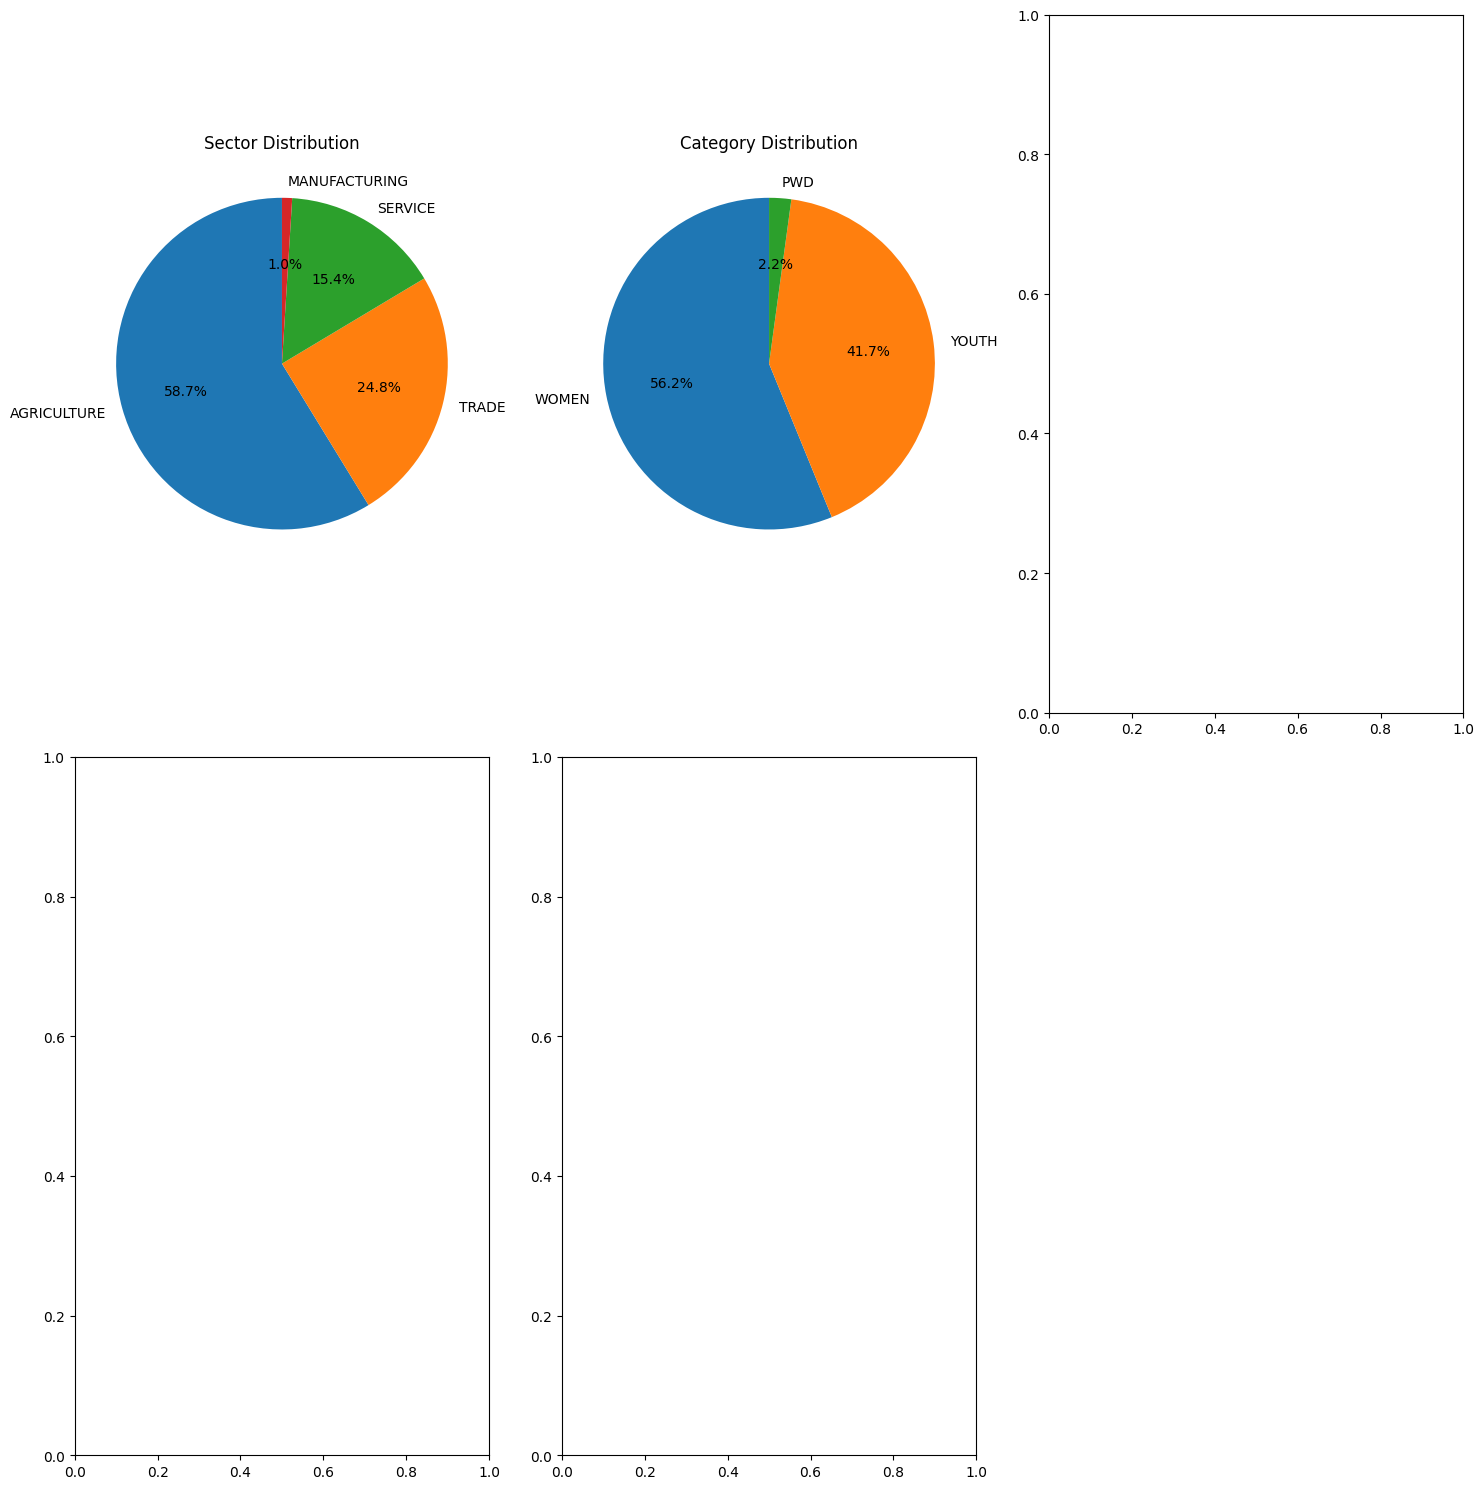

In [ ]:
# Specify the maximum number of categories to show individually
max_categories = 4

cat_vars = ['Sector', 'Category',]

# Create a figure and axes
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))

# Create a pie chart for each categorical variable
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        # Count the number of occurrences for each category
        cat_counts = Uwezofunddataset[var].value_counts()

        # Group categories beyond the top max_categories as 'Other'
        if len(cat_counts) > max_categories:
            cat_counts_top = cat_counts[:max_categories]
            cat_counts_other = pd.Series(cat_counts[max_categories:].sum(), index=['Other'])
            cat_counts = pd.concat([cat_counts_top, cat_counts_other])

        # Create a pie chart
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

        # Set a title for each subplot
        axs.flat[i].set_title(f'{var} Distribution')

# Adjust spacing between subplots
fig.tight_layout()

# remove sixth plot
fig.delaxes(axs[1][2])

# Show the plot
plt.show()

In [ ]:
Uwezofunddataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131 entries, 0 to 1130
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   AMOUNT APPROVED                   1131 non-null   int64         
 1   PAYMENT VOUCHER                   1128 non-null   object        
 2   CHEQUE NO.                        1130 non-null   float64       
 3   REMARKS                           881 non-null    object        
 4   SNo.                              1116 non-null   float64       
 5   Date of Disbursement              1131 non-null   datetime64[ns]
 6   Name of the group/institution     1116 non-null   object        
 7   G.F.S.CODE                        1115 non-null   object        
 8   Sector                            1115 non-null   object        
 9   Category                          1116 non-null   object        
 10  Amount Issued                     1116 non-null 

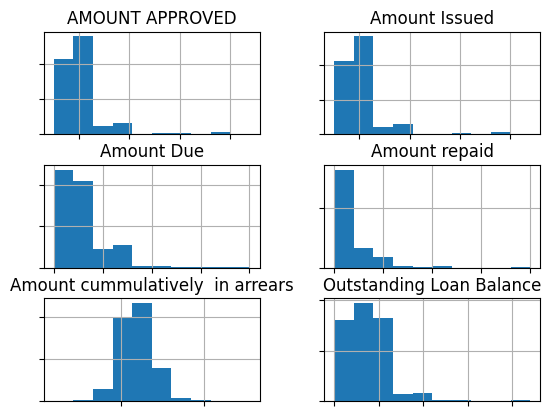

In [ ]:
num_vars = ['AMOUNT APPROVED','Amount Issued','Amount Due','Amount repaid','Amount cummulatively  in arrears','Outstanding Loan Balance']
subset =Uwezofunddataset[num_vars]
# create a histogram plot of each numeric variable
ax = subset.hist()
for axis in ax.flatten():
 axis.set_xticklabels([])
 axis.set_yticklabels([])
# show the plot
plt.show()

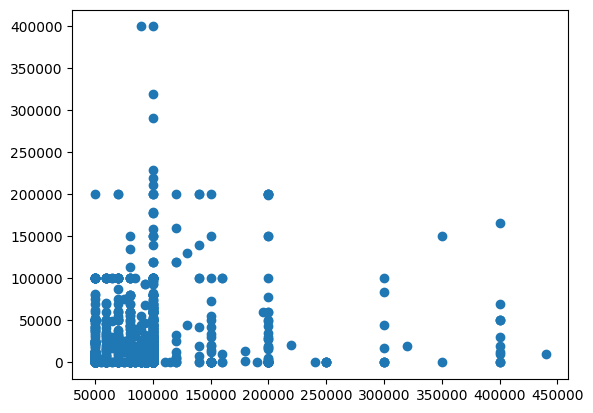

In [ ]:
# Create the scatter plot
plt.scatter(Uwezofunddataset['AMOUNT APPROVED'],Uwezofunddataset['Amount repaid'])

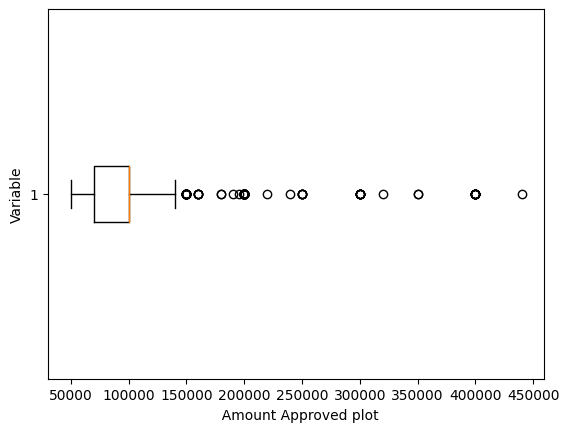

In [ ]:
plt.boxplot(Uwezofunddataset['AMOUNT APPROVED'], vert=False)
plt.ylabel('Variable')
plt.xlabel('  Amount Approved plot')
plt.show()

**Data** **Anonymisation**

check for sensitive columns and anonymize.

In [ ]:
!pip install anonymizedf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.7 MB/s eta 0:00:00


###Masking

In [ ]:
# Anonymize DF
from anonymizedf.anonymizedf import anonymize
# Create an instance of the Anonymizedf class
anon = anonymize(Uwezofunddataset)
# AnonymizeDF can generate fake names
anon.fake_categories("Name of the group/institution")
anon.fake_ids("G.F.S.CODE")

,AMOUNT APPROVED,PAYMENT VOUCHER,CHEQUE NO.,REMARKS,SNo.,Date of Disbursement,Name of the group/institution,G.F.S.CODE,Sector,Category,Amount Issued,Amount Due,Amount repaid,Amount cummulatively in arrears,Outstanding Loan Balance,Date of Repayment completion,Fake_Name of the group/institution,Fake_G.F.S.CODE
0,150000,1,1.0,NaN,1.0,2014-12-20,CHEPNYANYIN,4-033-178-4110202-402,AGRICULTURE,WOMEN,100000.0,300000.0,0.0,300000.0,100000.0,2017-06-20,Name of the group/institution 1,FWGS87327491136730
1,100000,1,2.0,NaN,2.0,2018-11-23,CHEPKOIYET JIINUE,4-033-178-4110202-102,TRADE,WOMEN,100000.0,0.0,100000.0,-100000.0,0.0,2021-05-23,Name of the group/institution 2,RJCR13736972987724
2,50000,1,3.0,NaN,3.0,2014-12-22,CHANGINA KOLONGEI,4-033-178-4110202-402,AGRICULTURE,WOMEN,50000.0,150000.0,14666.0,135334.0,35334.0,2017-06-22,Name of the group/institution 3,FWGS87327491136730
3,90000,1,4.0,NaN,4.0,2014-12-22,MOTOSIET ENTERPRICE GROUP,4-033-178-4110201-401,AGRICULTURE,YOUTH,90000.0,270000.0,0.0,270000.0,90000.0,2017-06-22,Name of the group/institution 4,EYPW86233725617229
4,90000,1,5.0,NaN,5.0,2014-12-22,KERTAI SACH ANGWAN,4-033-178-4110202-102,TRADE,WOMEN,90000.0,270000.0,0.0,270000.0,90000.0,2017-06-22,Name of the group/institution 5,RJCR13736972987724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126,200000,5.0,382.0,APPROVED,NaN,2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01,Name of the group/institution 1020,SXRQ13906416160996
1127,200000,6.0,383.0,APPROVED,NaN,2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01,Name of the group/institution 1020,SXRQ13906416160996
1128,200000,26.0,503.0,APPROVED,NaN,2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01,Name of the group/institution 1020,SXRQ13906416160996
1129,100000,25.0,502.0,APPROVED,NaN,2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01,Name of the group/institution 1020,SXRQ13906416160996


###Aggregation

In [ ]:
# Anonymize the amount issued,  and loan balance  by grouping them into  ranges

bins = [0, 50000, 100000, 200000, 300000, 400000]
labels = ['0-50000', '50000-100000', '100000-200000', '200000-300000', '300000-400000']
Uwezofunddataset['Amount Issued'] = pd.cut(Uwezofunddataset['Amount Issued'], bins=bins, labels=labels)
Uwezofunddataset

,AMOUNT APPROVED,PAYMENT VOUCHER,CHEQUE NO.,REMARKS,SNo.,Date of Disbursement,Name of the group/institution,G.F.S.CODE,Sector,Category,Amount Issued,Amount Due,Amount repaid,Amount cummulatively in arrears,Outstanding Loan Balance,Date of Repayment completion,Fake_Name of the group/institution,Fake_G.F.S.CODE
0,150000,1,1.0,NaN,1.0,2014-12-20,CHEPNYANYIN,4-033-178-4110202-402,AGRICULTURE,WOMEN,50000-100000,300000.0,0.0,300000.0,100000.0,2017-06-20,Name of the group/institution 1,FWGS87327491136730
1,100000,1,2.0,NaN,2.0,2018-11-23,CHEPKOIYET JIINUE,4-033-178-4110202-102,TRADE,WOMEN,50000-100000,0.0,100000.0,-100000.0,0.0,2021-05-23,Name of the group/institution 2,RJCR13736972987724
2,50000,1,3.0,NaN,3.0,2014-12-22,CHANGINA KOLONGEI,4-033-178-4110202-402,AGRICULTURE,WOMEN,0-50000,150000.0,14666.0,135334.0,35334.0,2017-06-22,Name of the group/institution 3,FWGS87327491136730
3,90000,1,4.0,NaN,4.0,2014-12-22,MOTOSIET ENTERPRICE GROUP,4-033-178-4110201-401,AGRICULTURE,YOUTH,50000-100000,270000.0,0.0,270000.0,90000.0,2017-06-22,Name of the group/institution 4,EYPW86233725617229
4,90000,1,5.0,NaN,5.0,2014-12-22,KERTAI SACH ANGWAN,4-033-178-4110202-102,TRADE,WOMEN,50000-100000,270000.0,0.0,270000.0,90000.0,2017-06-22,Name of the group/institution 5,RJCR13736972987724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126,200000,5.0,382.0,APPROVED,NaN,2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01,Name of the group/institution 1020,SXRQ13906416160996
1127,200000,6.0,383.0,APPROVED,NaN,2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01,Name of the group/institution 1020,SXRQ13906416160996
1128,200000,26.0,503.0,APPROVED,NaN,2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01,Name of the group/institution 1020,SXRQ13906416160996
1129,100000,25.0,502.0,APPROVED,NaN,2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01,Name of the group/institution 1020,SXRQ13906416160996


In [ ]:
bins = [0, 50000, 100000, 200000, 300000, 400000]
labels = ['0-50000', '50000-100000', '100000-200000', '200000-300000', '300000-400000']
Uwezofunddataset['Outstanding Loan Balance'] = pd.cut(Uwezofunddataset['Outstanding Loan Balance'], bins=bins, labels=labels)
Uwezofunddataset

,AMOUNT APPROVED,PAYMENT VOUCHER,CHEQUE NO.,REMARKS,SNo.,Date of Disbursement,Name of the group/institution,G.F.S.CODE,Sector,Category,Amount Issued,Amount Due,Amount repaid,Amount cummulatively in arrears,Outstanding Loan Balance,Date of Repayment completion,Fake_Name of the group/institution,Fake_G.F.S.CODE
0,150000,1,1.0,NaN,1.0,2014-12-20,CHEPNYANYIN,4-033-178-4110202-402,AGRICULTURE,WOMEN,50000-100000,300000.0,0.0,300000.0,50000-100000,2017-06-20,Name of the group/institution 1,FWGS87327491136730
1,100000,1,2.0,NaN,2.0,2018-11-23,CHEPKOIYET JIINUE,4-033-178-4110202-102,TRADE,WOMEN,50000-100000,0.0,100000.0,-100000.0,NaN,2021-05-23,Name of the group/institution 2,RJCR13736972987724
2,50000,1,3.0,NaN,3.0,2014-12-22,CHANGINA KOLONGEI,4-033-178-4110202-402,AGRICULTURE,WOMEN,0-50000,150000.0,14666.0,135334.0,0-50000,2017-06-22,Name of the group/institution 3,FWGS87327491136730
3,90000,1,4.0,NaN,4.0,2014-12-22,MOTOSIET ENTERPRICE GROUP,4-033-178-4110201-401,AGRICULTURE,YOUTH,50000-100000,270000.0,0.0,270000.0,50000-100000,2017-06-22,Name of the group/institution 4,EYPW86233725617229
4,90000,1,5.0,NaN,5.0,2014-12-22,KERTAI SACH ANGWAN,4-033-178-4110202-102,TRADE,WOMEN,50000-100000,270000.0,0.0,270000.0,50000-100000,2017-06-22,Name of the group/institution 5,RJCR13736972987724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126,200000,5.0,382.0,APPROVED,NaN,2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01,Name of the group/institution 1020,SXRQ13906416160996
1127,200000,6.0,383.0,APPROVED,NaN,2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01,Name of the group/institution 1020,SXRQ13906416160996
1128,200000,26.0,503.0,APPROVED,NaN,2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01,Name of the group/institution 1020,SXRQ13906416160996
1129,100000,25.0,502.0,APPROVED,NaN,2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01,Name of the group/institution 1020,SXRQ13906416160996


**Calculating Credit Scores**
The dataset doesn’t have any feature representing the credit scores of groups. To calculate the credit scores, we are going to use the following 4 variables:  sector, category, amount issued and outstanding  loan balance

Below is how we  calculated credit scores:

In [ ]:
s = (Uwezofunddataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['PAYMENT VOUCHER', 'REMARKS', 'Name of the group/institution', 'G.F.S.CODE', 'Sector', 'Category', 'Fake_Name of the group/institution', 'Fake_G.F.S.CODE']


In [ ]:
# Define the mapping for categorical features
sector_mapping = {'MANUFACTURING': 1,'SERVICE': 2, 'TRADE': 3,  'AGRICULTURE': 4,}
category_mapping = {'PWD': 1, 'YOUTH': 2, 'WOMEN': 3}


In [ ]:
# Apply mapping to categorical features
Uwezofunddataset['Sector'] = Uwezofunddataset['Sector'].map(sector_mapping )
Uwezofunddataset['Category'] = Uwezofunddataset['Category'].map(category_mapping)

print (Uwezofunddataset)

      AMOUNT APPROVED PAYMENT VOUCHER  CHEQUE NO.   REMARKS  SNo.  \
0              150000               1         1.0       NaN   1.0   
1              100000               1         2.0       NaN   2.0   
2               50000               1         3.0       NaN   3.0   
3               90000               1         4.0       NaN   4.0   
4               90000               1         5.0       NaN   5.0   
...               ...             ...         ...       ...   ...   
1126           200000             5.0       382.0  APPROVED   NaN   
1127           200000             6.0       383.0  APPROVED   NaN   
1128           200000            26.0       503.0  APPROVED   NaN   
1129           100000            25.0       502.0  APPROVED   NaN   
1130           400000            24.0       501.0  APPROVED   NaN   

     Date of Disbursement Name of the group/institution  \
0              2014-12-20                  CHEPNYANYIN    
1              2018-11-23             CHEPKOIYET JIIN

In [ ]:
# Define the mapping for categorical features2
amount_issued_mapping = {'0-50000': 1,'50000-100000': 2, '100000-200000': 3, '200000-300000': 4,'300000-400000': 5}
outstanding_loan_balance_mapping = {'300000-400000': 1,'200000-300000': 2,'100000-200000': 3,'50000-100000': 4,'0-50000': 5}
Uwezofunddataset['Amount Issued'] = Uwezofunddataset['Amount Issued'].map(amount_issued_mapping)
Uwezofunddataset['Outstanding Loan Balance'] = Uwezofunddataset['Outstanding Loan Balance'].map(outstanding_loan_balance_mapping)

In [ ]:
# Calculate credit scores
credit_scores = []
for index, row in Uwezofunddataset.iterrows():
      Amount_Issued = row['Amount Issued']
      Outstanding_Loan_Balance= row['Outstanding Loan Balance']
      Sector   = row['Sector']
      Category   = row['Category']

      # Add the values of the variables to calculate the credit score
      credit_score =(Amount_Issued) + (Outstanding_Loan_Balance) + (Sector) + (Category)
      credit_scores.append(credit_score)

# Add the credit scores as a new column to the dataset2
Uwezofunddataset['Credit Score'] = credit_scores

print(Uwezofunddataset.head())

   AMOUNT APPROVED PAYMENT VOUCHER  CHEQUE NO. REMARKS  SNo.  \
0           150000               1         1.0     NaN   1.0   
1           100000               1         2.0     NaN   2.0   
2            50000               1         3.0     NaN   3.0   
3            90000               1         4.0     NaN   4.0   
4            90000               1         5.0     NaN   5.0   

  Date of Disbursement Name of the group/institution             G.F.S.CODE  \
0           2014-12-20                  CHEPNYANYIN   4-033-178-4110202-402   
1           2018-11-23             CHEPKOIYET JIINUE  4-033-178-4110202-102   
2           2014-12-22             CHANGINA KOLONGEI  4-033-178-4110202-402   
3           2014-12-22    MOTOSIET ENTERPRICE GROUP   4-033-178-4110201-401   
4           2014-12-22            KERTAI SACH ANGWAN  4-033-178-4110202-102   

   Sector  Category Amount Issued  Amount Due  Amount repaid  \
0     4.0       3.0             2    300000.0            0.0   
1     3.0   

In [ ]:
Uwezofunddataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131 entries, 0 to 1130
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   AMOUNT APPROVED                     1131 non-null   int64         
 1   PAYMENT VOUCHER                     1128 non-null   object        
 2   CHEQUE NO.                          1130 non-null   float64       
 3   REMARKS                             881 non-null    object        
 4   SNo.                                1116 non-null   float64       
 5   Date of Disbursement                1131 non-null   datetime64[ns]
 6   Name of the group/institution       1116 non-null   object        
 7   G.F.S.CODE                          1115 non-null   object        
 8   Sector                              1115 non-null   float64       
 9   Category                            1116 non-null   float64       
 10  Amount Issued           

In [ ]:
Uwezofunddataset.describe()

,AMOUNT APPROVED,CHEQUE NO.,SNo.,Date of Disbursement,Sector,Category,Amount Due,Amount repaid,Amount cummulatively in arrears,Date of Repayment completion,Credit Score
count,1131.000000,1130.000000,1116.000000,1131,1115.000000,1116.000000,1116.000000,1115.000000,1115.000000,1129,941.000000
mean,99921.396994,154.239823,147.081541,2015-12-05 08:44:33.740053248,3.413453,2.540323,109001.455795,29021.386547,97218.854410,2018-11-11 01:12:42.090345472,12.082891
min,50000.000000,0.000000,1.000000,1970-01-01 00:00:00.000042156,1.000000,1.000000,0.000000,0.000000,-400000.000000,2017-01-01 00:00:00,8.000000
25%,70000.000000,71.000000,70.000000,2014-12-20 00:00:00,3.000000,2.000000,41625.000000,0.000000,30000.000000,2017-06-16 00:00:00,11.000000
50%,100000.000000,144.000000,140.000000,2015-02-13 00:00:00,4.000000,3.000000,95800.000000,10000.000000,90000.000000,2017-08-30 00:00:00,12.000000
75%,100000.000000,223.000000,210.000000,2015-07-20 00:00:00,4.000000,3.000000,150000.000000,43362.500000,150000.000000,2020-10-27 00:00:00,13.000000
max,440000.000000,940.000000,386.000000,2023-06-16 00:00:00,4.000000,3.000000,802083.333333,400000.000000,775083.333333,2025-12-17 00:00:00,15.000000
std,55668.343765,103.819365,93.406530,NaN,0.781518,0.540043,99663.907895,45436.741795,108094.533387,NaN,1.065681


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
Uwezofunddataset['Credit Score'] = imputer.fit_transform(Uwezofunddataset[['Credit Score']])

In [ ]:
print(Uwezofunddataset.head())

   AMOUNT APPROVED PAYMENT VOUCHER  CHEQUE NO. REMARKS  SNo.  \
0           150000               1         1.0     NaN   1.0   
1           100000               1         2.0     NaN   2.0   
2            50000               1         3.0     NaN   3.0   
3            90000               1         4.0     NaN   4.0   
4            90000               1         5.0     NaN   5.0   

  Date of Disbursement Name of the group/institution             G.F.S.CODE  \
0           2014-12-20                  CHEPNYANYIN   4-033-178-4110202-402   
1           2018-11-23             CHEPKOIYET JIINUE  4-033-178-4110202-102   
2           2014-12-22             CHANGINA KOLONGEI  4-033-178-4110202-402   
3           2014-12-22    MOTOSIET ENTERPRICE GROUP   4-033-178-4110201-401   
4           2014-12-22            KERTAI SACH ANGWAN  4-033-178-4110202-102   

   Sector  Category Amount Issued  Amount Due  Amount repaid  \
0     4.0       3.0             2    300000.0            0.0   
1     3.0   

**Segmentation Based on Credit Scores**

In [ ]:
from sklearn.cluster import KMeans

X = Uwezofunddataset[['Credit Score']]
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
kmeans.fit(X)
Uwezofunddataset['Segment'] = kmeans.labels_

 **Segments**:

In [ ]:
# Convert the 'Segment' column to category data type
Uwezofunddataset['Segment'] = Uwezofunddataset['Segment'].astype('category')

# Visualize the segments using Plotly
import plotly.express as px
fig = px.scatter(Uwezofunddataset, x=Uwezofunddataset.index, y='Credit Score', color='Segment',
                 color_discrete_sequence=['green', 'red'])
fig.update_layout(
    xaxis_title='Customer Index',
    yaxis_title='Credit Score',
    title='Customer Segmentation based on Credit Scores'
)
fig.show()

In [ ]:
Uwezofunddataset['Segment'] = Uwezofunddataset['Segment'].map({
                                       0: 'Low',
                                       1: 'High',
                                       })

# Convert the 'Segment' column to category data type
Uwezofunddataset['Segment'] = Uwezofunddataset['Segment'].astype('category')

# Visualize the segments using Plotly
fig = px.scatter(Uwezofunddataset, x=Uwezofunddataset.index, y='Credit Score', color='Segment',
                 color_discrete_sequence=['green', 'red'])
fig.update_layout(
    xaxis_title='Customer Index',
    yaxis_title='Credit Score',
    title='Customer Segmentation based on Credit Scores'
)
fig.show()

**Exploratory Data Analysis II**

Summary Statistics

In [ ]:
Uwezofunddataset.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
AMOUNT APPROVED,1131.0,99921.396994,50000.0,70000.0,100000.0,100000.0,440000.0,55668.343765
CHEQUE NO.,1130.0,154.239823,0.0,71.0,144.0,223.0,940.0,103.819365
SNo.,1116.0,147.081541,1.0,70.0,140.0,210.0,386.0,93.40653
Date of Disbursement,1131,2015-12-05 08:44:33.740053248,1970-01-01 00:00:00.000042156,2014-12-20 00:00:00,2015-02-13 00:00:00,2015-07-20 00:00:00,2023-06-16 00:00:00,NaN
Sector,1115.0,3.413453,1.0,3.0,4.0,4.0,4.0,0.781518
Category,1116.0,2.540323,1.0,2.0,3.0,3.0,3.0,0.540043
Amount Due,1116.0,109001.455795,0.0,41625.0,95800.0,150000.0,802083.333333,99663.907895
Amount repaid,1115.0,29021.386547,0.0,0.0,10000.0,43362.5,400000.0,45436.741795
Amount cummulatively in arrears,1115.0,97218.85441,-400000.0,30000.0,90000.0,150000.0,775083.333333,108094.533387
Date of Repayment completion,1129,2018-11-11 01:12:42.090345472,2017-01-01 00:00:00,2017-06-16 00:00:00,2017-08-30 00:00:00,2020-10-27 00:00:00,2025-12-17 00:00:00,NaN


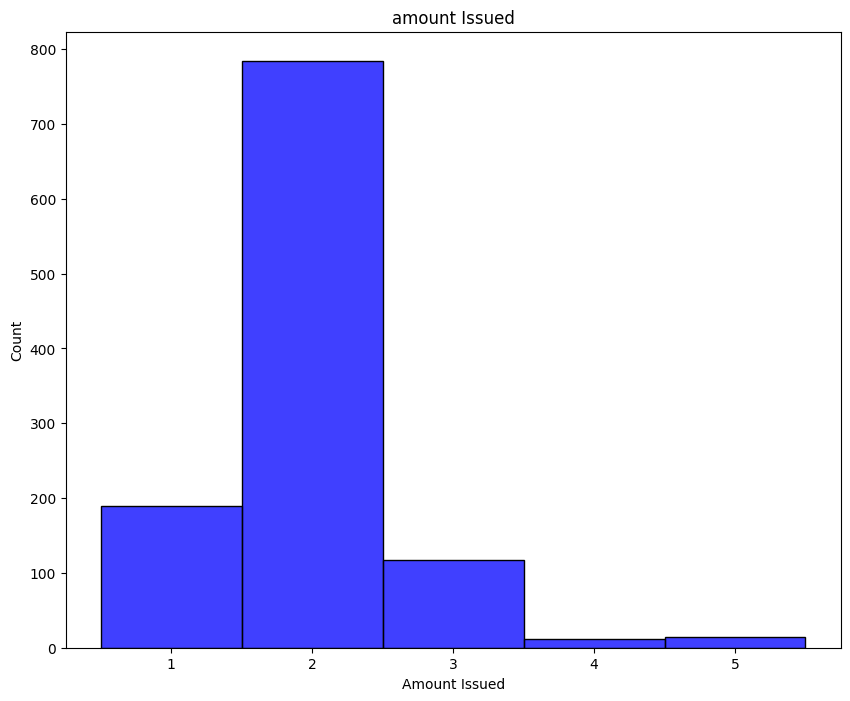

In [ ]:
# Plotting distribution of Credit amount feature
plt.figure(figsize=(10,8), )
plt.title('amount Issued')
sns.histplot(Uwezofunddataset['Amount Issued'], color='blue')

# Save the plot as PNG file
plt.savefig('ACTUAL AMOUNT ISSUED_distribution.png');

Segment
Low     242
High    889
dtype: int64


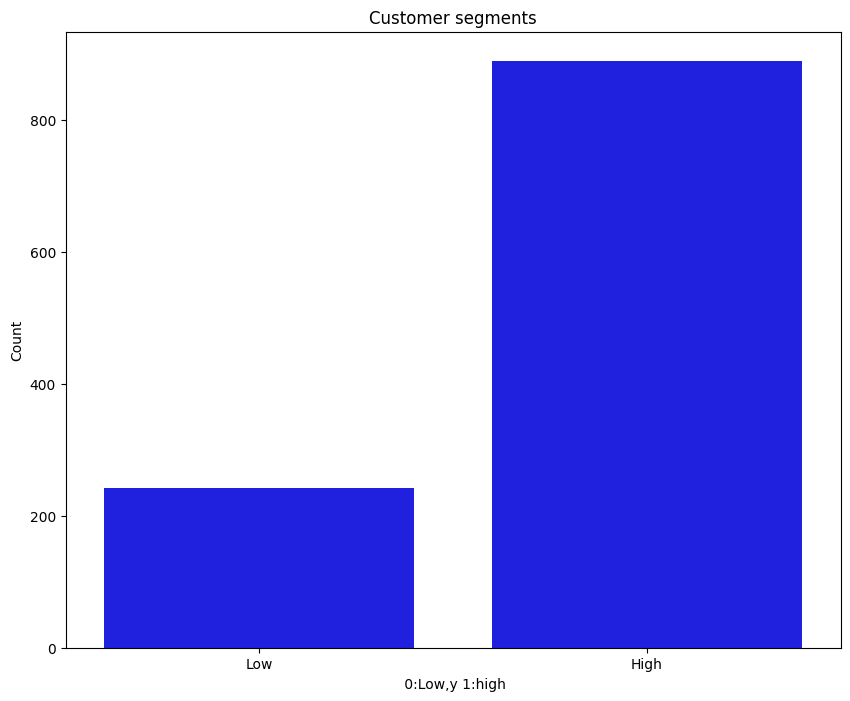

In [ ]:
print (Uwezofunddataset.groupby("Segment").size())
plt.figure(figsize=(10,8))
sns.barplot(x=Uwezofunddataset['Segment'].value_counts().index, y=Uwezofunddataset['Segment'].value_counts(), color='blue')
plt.title('Customer segments')
plt.ylabel('Count')
plt.xlabel(' 0:Low,y 1:high')

# Save the plot as PNG file
plt.savefig('High_vs_Low _Credit.png');

Data Visualization

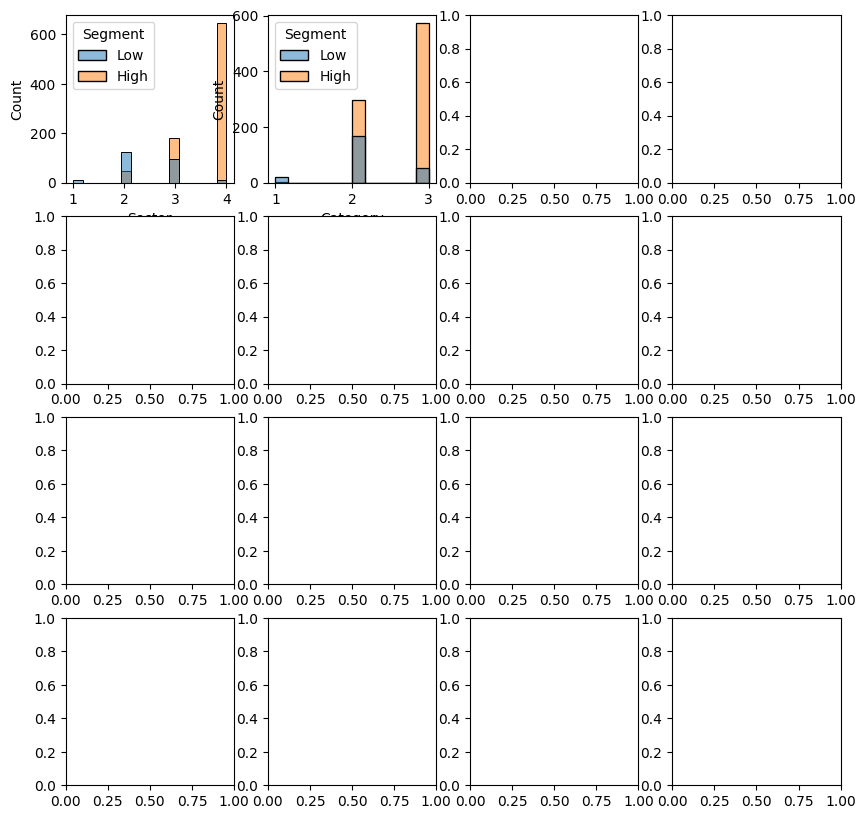

In [ ]:
# Create a figure with subplots
cat_vars = ['Sector', 'Category']
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
axs = axs.flatten()

# Plot each categorical feature against the target variable
for i, feature in enumerate(cat_vars):
    sns.histplot(x=feature, hue="Segment", data=Uwezofunddataset, ax=axs[i])

# Show the plot
plt.show()

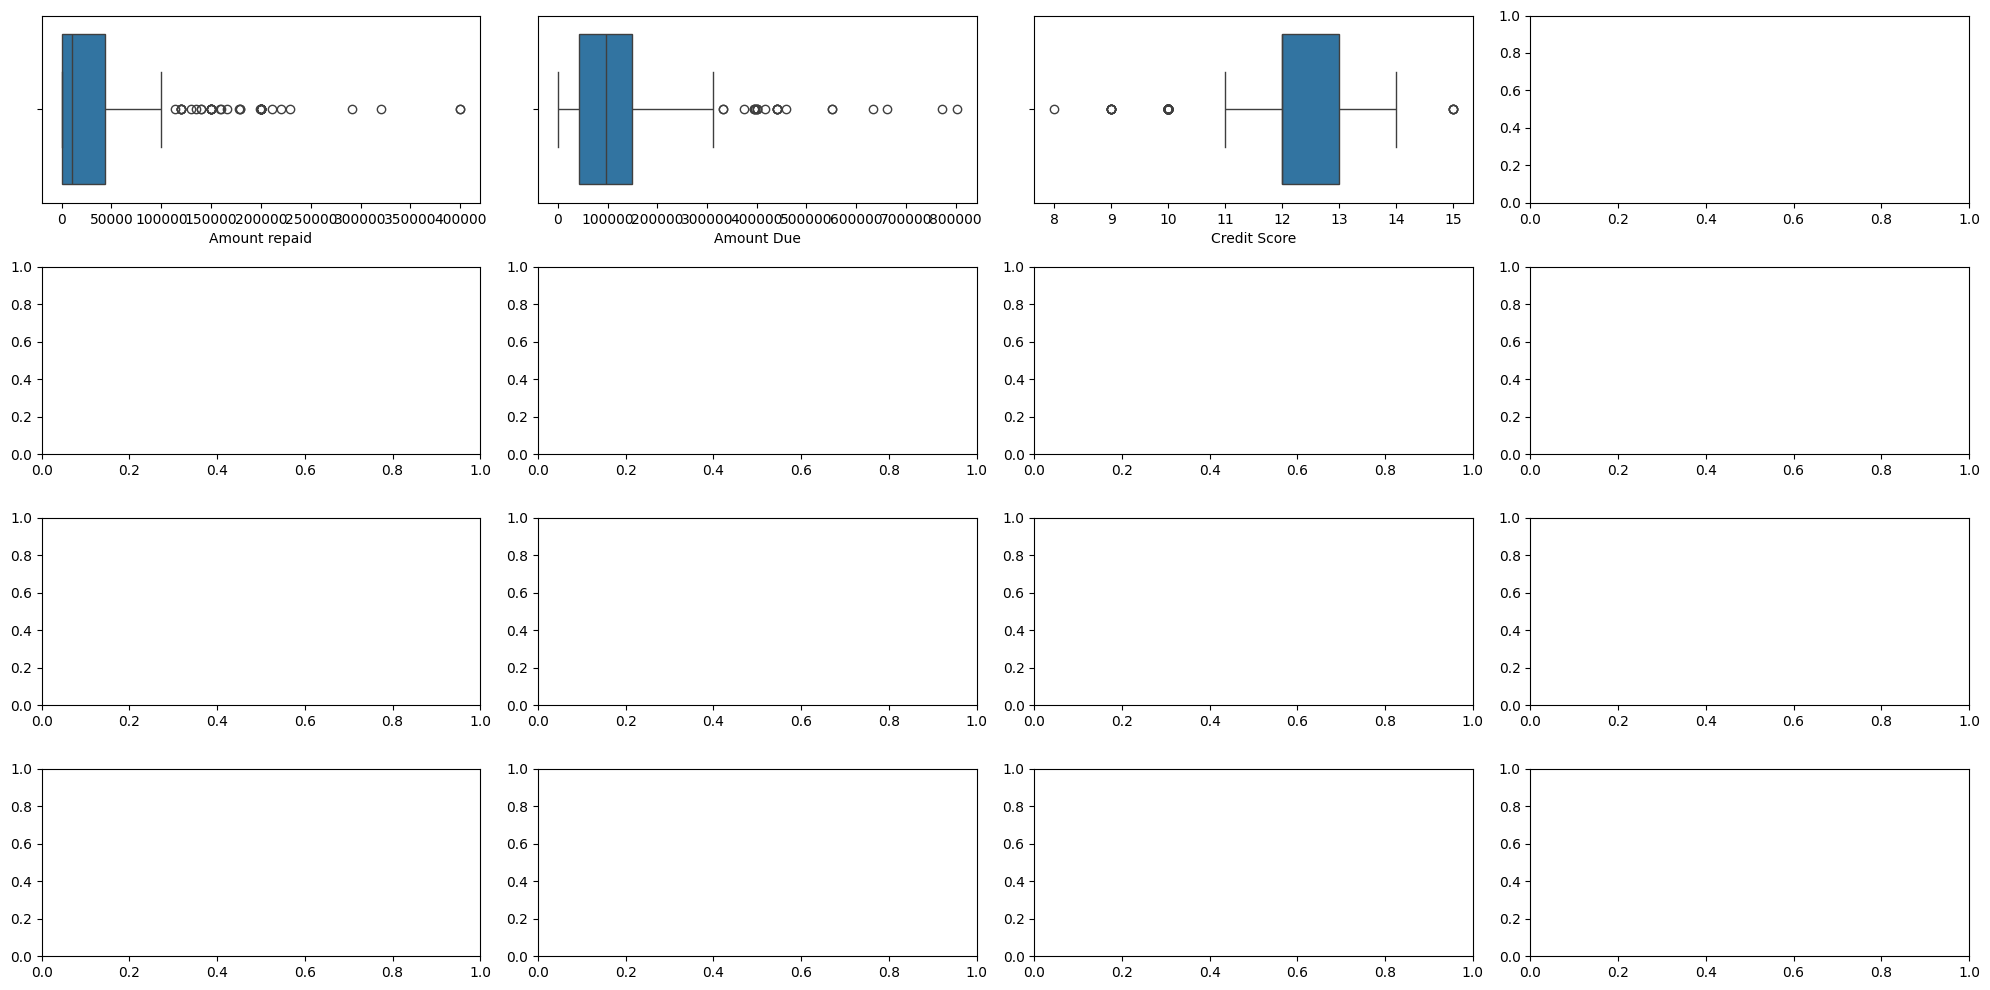

In [ ]:
# list of numerical variables to plot
num_vars = ['Amount repaid','Amount Due','Credit Score']
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=Uwezofunddataset, ax=axs[i])

fig.tight_layout()

plt.show()

In [ ]:
Uwezofunddataset

,AMOUNT APPROVED,PAYMENT VOUCHER,CHEQUE NO.,REMARKS,SNo.,Date of Disbursement,Name of the group/institution,G.F.S.CODE,Sector,Category,Amount Issued,Amount Due,Amount repaid,Amount cummulatively in arrears,Outstanding Loan Balance,Date of Repayment completion,Fake_Name of the group/institution,Fake_G.F.S.CODE,Credit Score,Segment
0,150000,1,1.0,NaN,1.0,2014-12-20,CHEPNYANYIN,4-033-178-4110202-402,4.0,3.0,2,300000.0,0.0,300000.0,4,2017-06-20,Name of the group/institution 1,FWGS87327491136730,13.0,High
1,100000,1,2.0,NaN,2.0,2018-11-23,CHEPKOIYET JIINUE,4-033-178-4110202-102,3.0,3.0,2,0.0,100000.0,-100000.0,NaN,2021-05-23,Name of the group/institution 2,RJCR13736972987724,12.0,High
2,50000,1,3.0,NaN,3.0,2014-12-22,CHANGINA KOLONGEI,4-033-178-4110202-402,4.0,3.0,1,150000.0,14666.0,135334.0,5,2017-06-22,Name of the group/institution 3,FWGS87327491136730,13.0,High
3,90000,1,4.0,NaN,4.0,2014-12-22,MOTOSIET ENTERPRICE GROUP,4-033-178-4110201-401,4.0,2.0,2,270000.0,0.0,270000.0,4,2017-06-22,Name of the group/institution 4,EYPW86233725617229,12.0,High
4,90000,1,5.0,NaN,5.0,2014-12-22,KERTAI SACH ANGWAN,4-033-178-4110202-102,3.0,3.0,2,270000.0,0.0,270000.0,4,2017-06-22,Name of the group/institution 5,RJCR13736972987724,12.0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126,200000,5.0,382.0,APPROVED,NaN,2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01,Name of the group/institution 1020,SXRQ13906416160996,12.0,High
1127,200000,6.0,383.0,APPROVED,NaN,2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01,Name of the group/institution 1020,SXRQ13906416160996,12.0,High
1128,200000,26.0,503.0,APPROVED,NaN,2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01,Name of the group/institution 1020,SXRQ13906416160996,12.0,High
1129,100000,25.0,502.0,APPROVED,NaN,2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01,Name of the group/institution 1020,SXRQ13906416160996,12.0,High


In [ ]:
Uwezofunddataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131 entries, 0 to 1130
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   AMOUNT APPROVED                     1131 non-null   int64         
 1   PAYMENT VOUCHER                     1128 non-null   object        
 2   CHEQUE NO.                          1130 non-null   float64       
 3   REMARKS                             881 non-null    object        
 4   SNo.                                1116 non-null   float64       
 5   Date of Disbursement                1131 non-null   datetime64[ns]
 6   Name of the group/institution       1116 non-null   object        
 7   G.F.S.CODE                          1115 non-null   object        
 8   Sector                              1115 non-null   float64       
 9   Category                            1116 non-null   float64       
 10  Amount Issued           

In [ ]:
Uwezofunddataset1 = Uwezofunddataset.drop(['Name of the group/institution',  'G.F.S.CODE'], axis=1)

In [ ]:
Uwezofunddataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131 entries, 0 to 1130
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   AMOUNT APPROVED                     1131 non-null   int64         
 1   PAYMENT VOUCHER                     1128 non-null   object        
 2   CHEQUE NO.                          1130 non-null   float64       
 3   REMARKS                             881 non-null    object        
 4   SNo.                                1116 non-null   float64       
 5   Date of Disbursement                1131 non-null   datetime64[ns]
 6   Sector                              1115 non-null   float64       
 7   Category                            1116 non-null   float64       
 8   Amount Issued                       1115 non-null   category      
 9   Amount Due                          1116 non-null   float64       
 10  Amount repaid           

In [ ]:
Uwezofunddataset1.rename(columns={'Fake_Name of the group/institution': 'Name of the group/institution'}, inplace=True)
Uwezofunddataset1.rename(columns={'Fake_G.F.S.CODE': 'G.F.S.CODE'}, inplace=True)
Uwezofunddataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131 entries, 0 to 1130
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   AMOUNT APPROVED                   1131 non-null   int64         
 1   PAYMENT VOUCHER                   1128 non-null   object        
 2   CHEQUE NO.                        1130 non-null   float64       
 3   REMARKS                           881 non-null    object        
 4   SNo.                              1116 non-null   float64       
 5   Date of Disbursement              1131 non-null   datetime64[ns]
 6   Sector                            1115 non-null   float64       
 7   Category                          1116 non-null   float64       
 8   Amount Issued                     1115 non-null   category      
 9   Amount Due                        1116 non-null   float64       
 10  Amount repaid                     1115 non-null 

In [ ]:
#rearranging columns
Uwezofunddataset2 = Uwezofunddataset1.loc[:,['Date of Disbursement','Name of the group/institution','G.F.S.CODE','PAYMENT VOUCHER','CHEQUE NO.','REMARKS','SNo.','Sector','Category','AMOUNT APPROVED', 'Amount Issued','Amount Due','Amount cummulatively  in arrears', 'Outstanding Loan Balance','Date of Repayment completion','Credit Score','Segment']]

In [ ]:
Uwezofunddataset3 = Uwezofunddataset2.drop(['Credit Score', ], axis=1)

In [ ]:
Uwezofunddataset3

,Date of Disbursement,Name of the group/institution,G.F.S.CODE,PAYMENT VOUCHER,CHEQUE NO.,REMARKS,SNo.,Sector,Category,AMOUNT APPROVED,Amount Issued,Amount Due,Amount cummulatively in arrears,Outstanding Loan Balance,Date of Repayment completion,Segment
0,2014-12-20,Name of the group/institution 1,FWGS87327491136730,1,1.0,NaN,1.0,4.0,3.0,150000,2,300000.0,300000.0,4,2017-06-20,High
1,2018-11-23,Name of the group/institution 2,RJCR13736972987724,1,2.0,NaN,2.0,3.0,3.0,100000,2,0.0,-100000.0,NaN,2021-05-23,High
2,2014-12-22,Name of the group/institution 3,FWGS87327491136730,1,3.0,NaN,3.0,4.0,3.0,50000,1,150000.0,135334.0,5,2017-06-22,High
3,2014-12-22,Name of the group/institution 4,EYPW86233725617229,1,4.0,NaN,4.0,4.0,2.0,90000,2,270000.0,270000.0,4,2017-06-22,High
4,2014-12-22,Name of the group/institution 5,RJCR13736972987724,1,5.0,NaN,5.0,3.0,3.0,90000,2,270000.0,270000.0,4,2017-06-22,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126,2014-01-01,Name of the group/institution 1020,SXRQ13906416160996,5.0,382.0,APPROVED,NaN,NaN,NaN,200000,NaN,NaN,NaN,NaN,2017-01-01,High
1127,2014-01-01,Name of the group/institution 1020,SXRQ13906416160996,6.0,383.0,APPROVED,NaN,NaN,NaN,200000,NaN,NaN,NaN,NaN,2017-01-01,High
1128,2014-01-01,Name of the group/institution 1020,SXRQ13906416160996,26.0,503.0,APPROVED,NaN,NaN,NaN,200000,NaN,NaN,NaN,NaN,2017-01-01,High
1129,2014-01-01,Name of the group/institution 1020,SXRQ13906416160996,25.0,502.0,APPROVED,NaN,NaN,NaN,100000,NaN,NaN,NaN,NaN,2017-01-01,High


In [ ]:
Uwezofunddataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131 entries, 0 to 1130
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Date of Disbursement              1131 non-null   datetime64[ns]
 1   Name of the group/institution     1131 non-null   object        
 2   G.F.S.CODE                        1131 non-null   object        
 3   PAYMENT VOUCHER                   1128 non-null   object        
 4   CHEQUE NO.                        1130 non-null   float64       
 5   REMARKS                           881 non-null    object        
 6   SNo.                              1116 non-null   float64       
 7   Sector                            1115 non-null   float64       
 8   Category                          1116 non-null   float64       
 9   AMOUNT APPROVED                   1131 non-null   int64         
 10  Amount Issued                     1115 non-null 

In [ ]:
# saving the dataframe
Uwezofunddataset3.to_csv('Uwezofunddatasetmay.csv')